In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




# 1--Dataset Downloaded

# 2--Load the dataset

In [2]:
data=pd.read_csv(r"D:\Chrome_Downloads\abalone.csv")

# 3--Visuslization

# Univariate analysis

<AxesSubplot: xlabel='Height', ylabel='Count'>

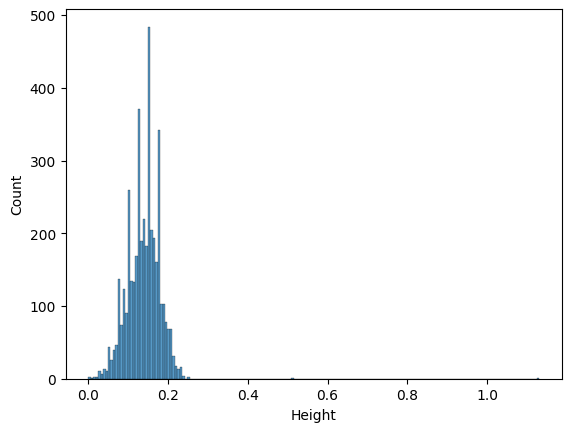

In [3]:
sns.histplot(data['Height'])

<AxesSubplot: >

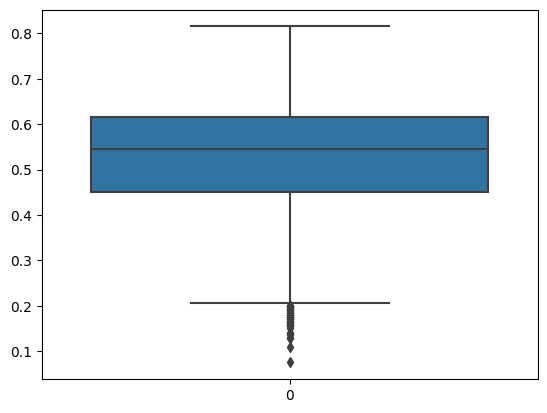

In [4]:

sns.boxplot(data['Length'])

<AxesSubplot: xlabel='Diameter', ylabel='Density'>

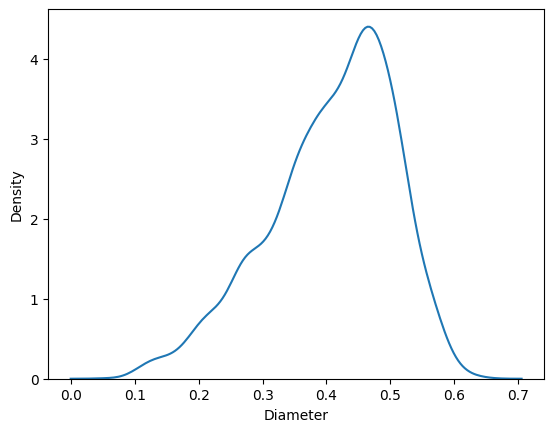

In [5]:
sns.kdeplot(data['Diameter'])

<AxesSubplot: xlabel='Whole weight', ylabel='Count'>

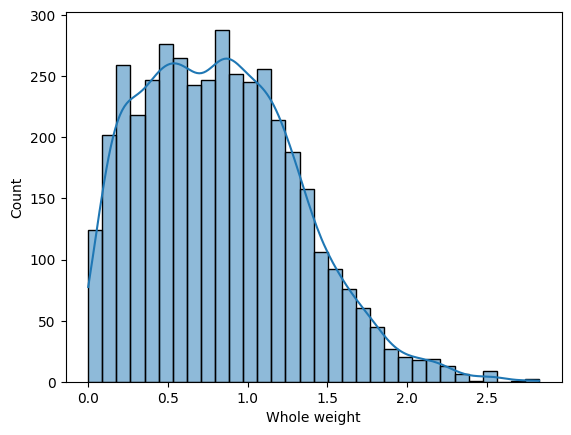

In [6]:
sns.histplot(data['Whole weight'],kde=True)

<AxesSubplot: xlabel='Shucked weight', ylabel='Density'>

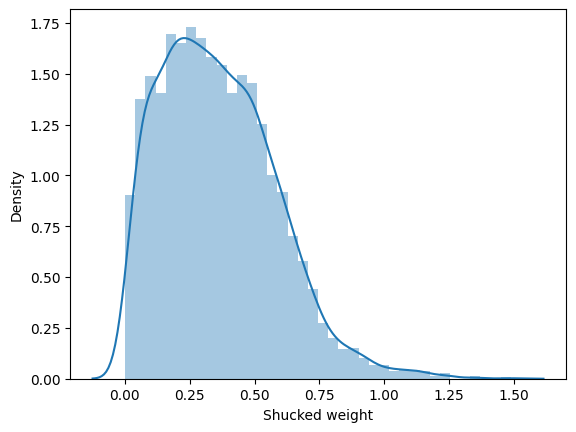

In [7]:
sns.distplot(data['Shucked weight'],kde=True)

# Bivariate Analysis

<AxesSubplot: xlabel='Viscera weight', ylabel='Shell weight'>

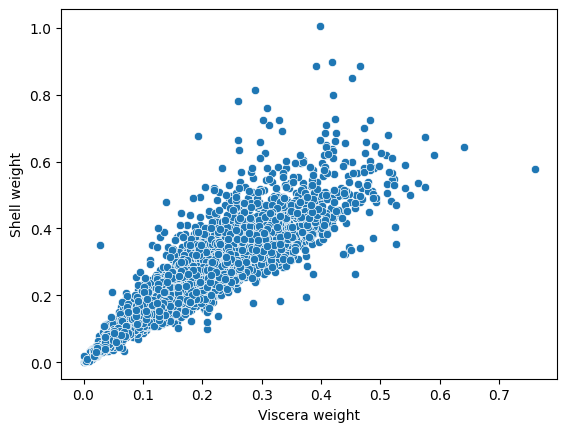

In [8]:
sns.scatterplot(data=data,x='Viscera weight', y='Shell weight')

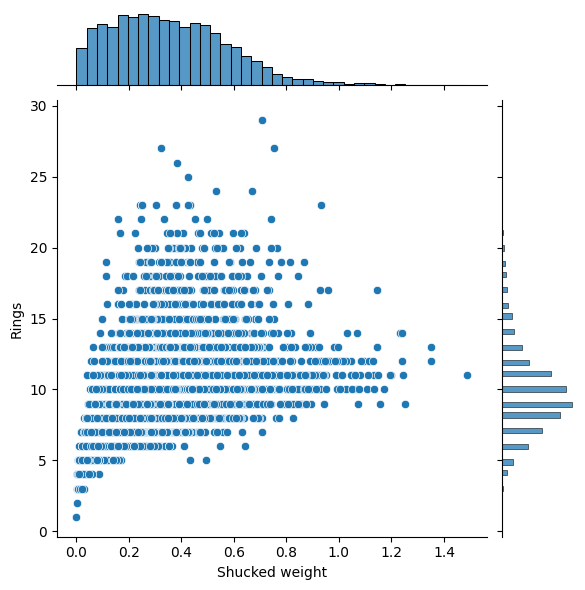

In [9]:
sns.jointplot(data=data,x='Shucked weight',y='Rings')

<AxesSubplot: xlabel='Sex', ylabel='Rings'>

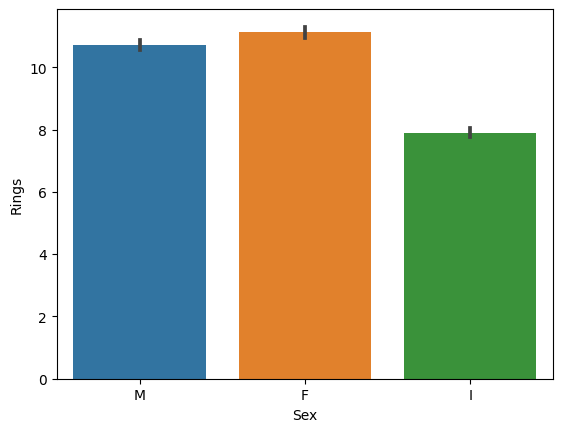

In [10]:
sns.barplot(data=data,x='Sex',y='Rings')

# Multivariate Analysis

In [11]:
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot: >

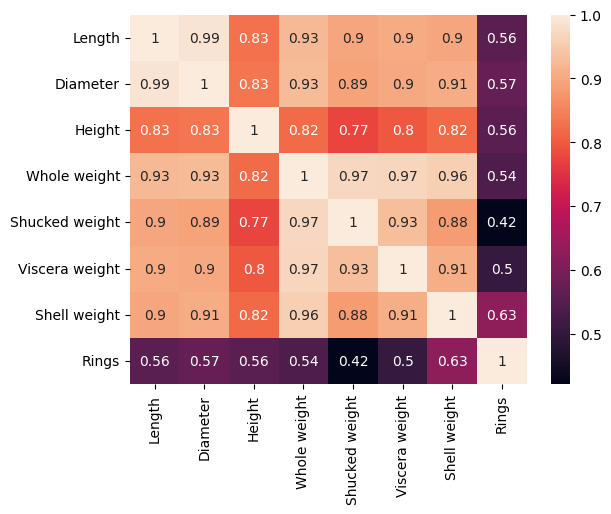

In [12]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot: ylabel='count'>

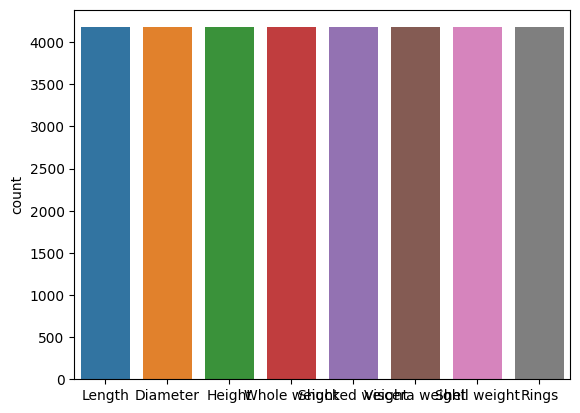

In [13]:
sns.countplot(data)

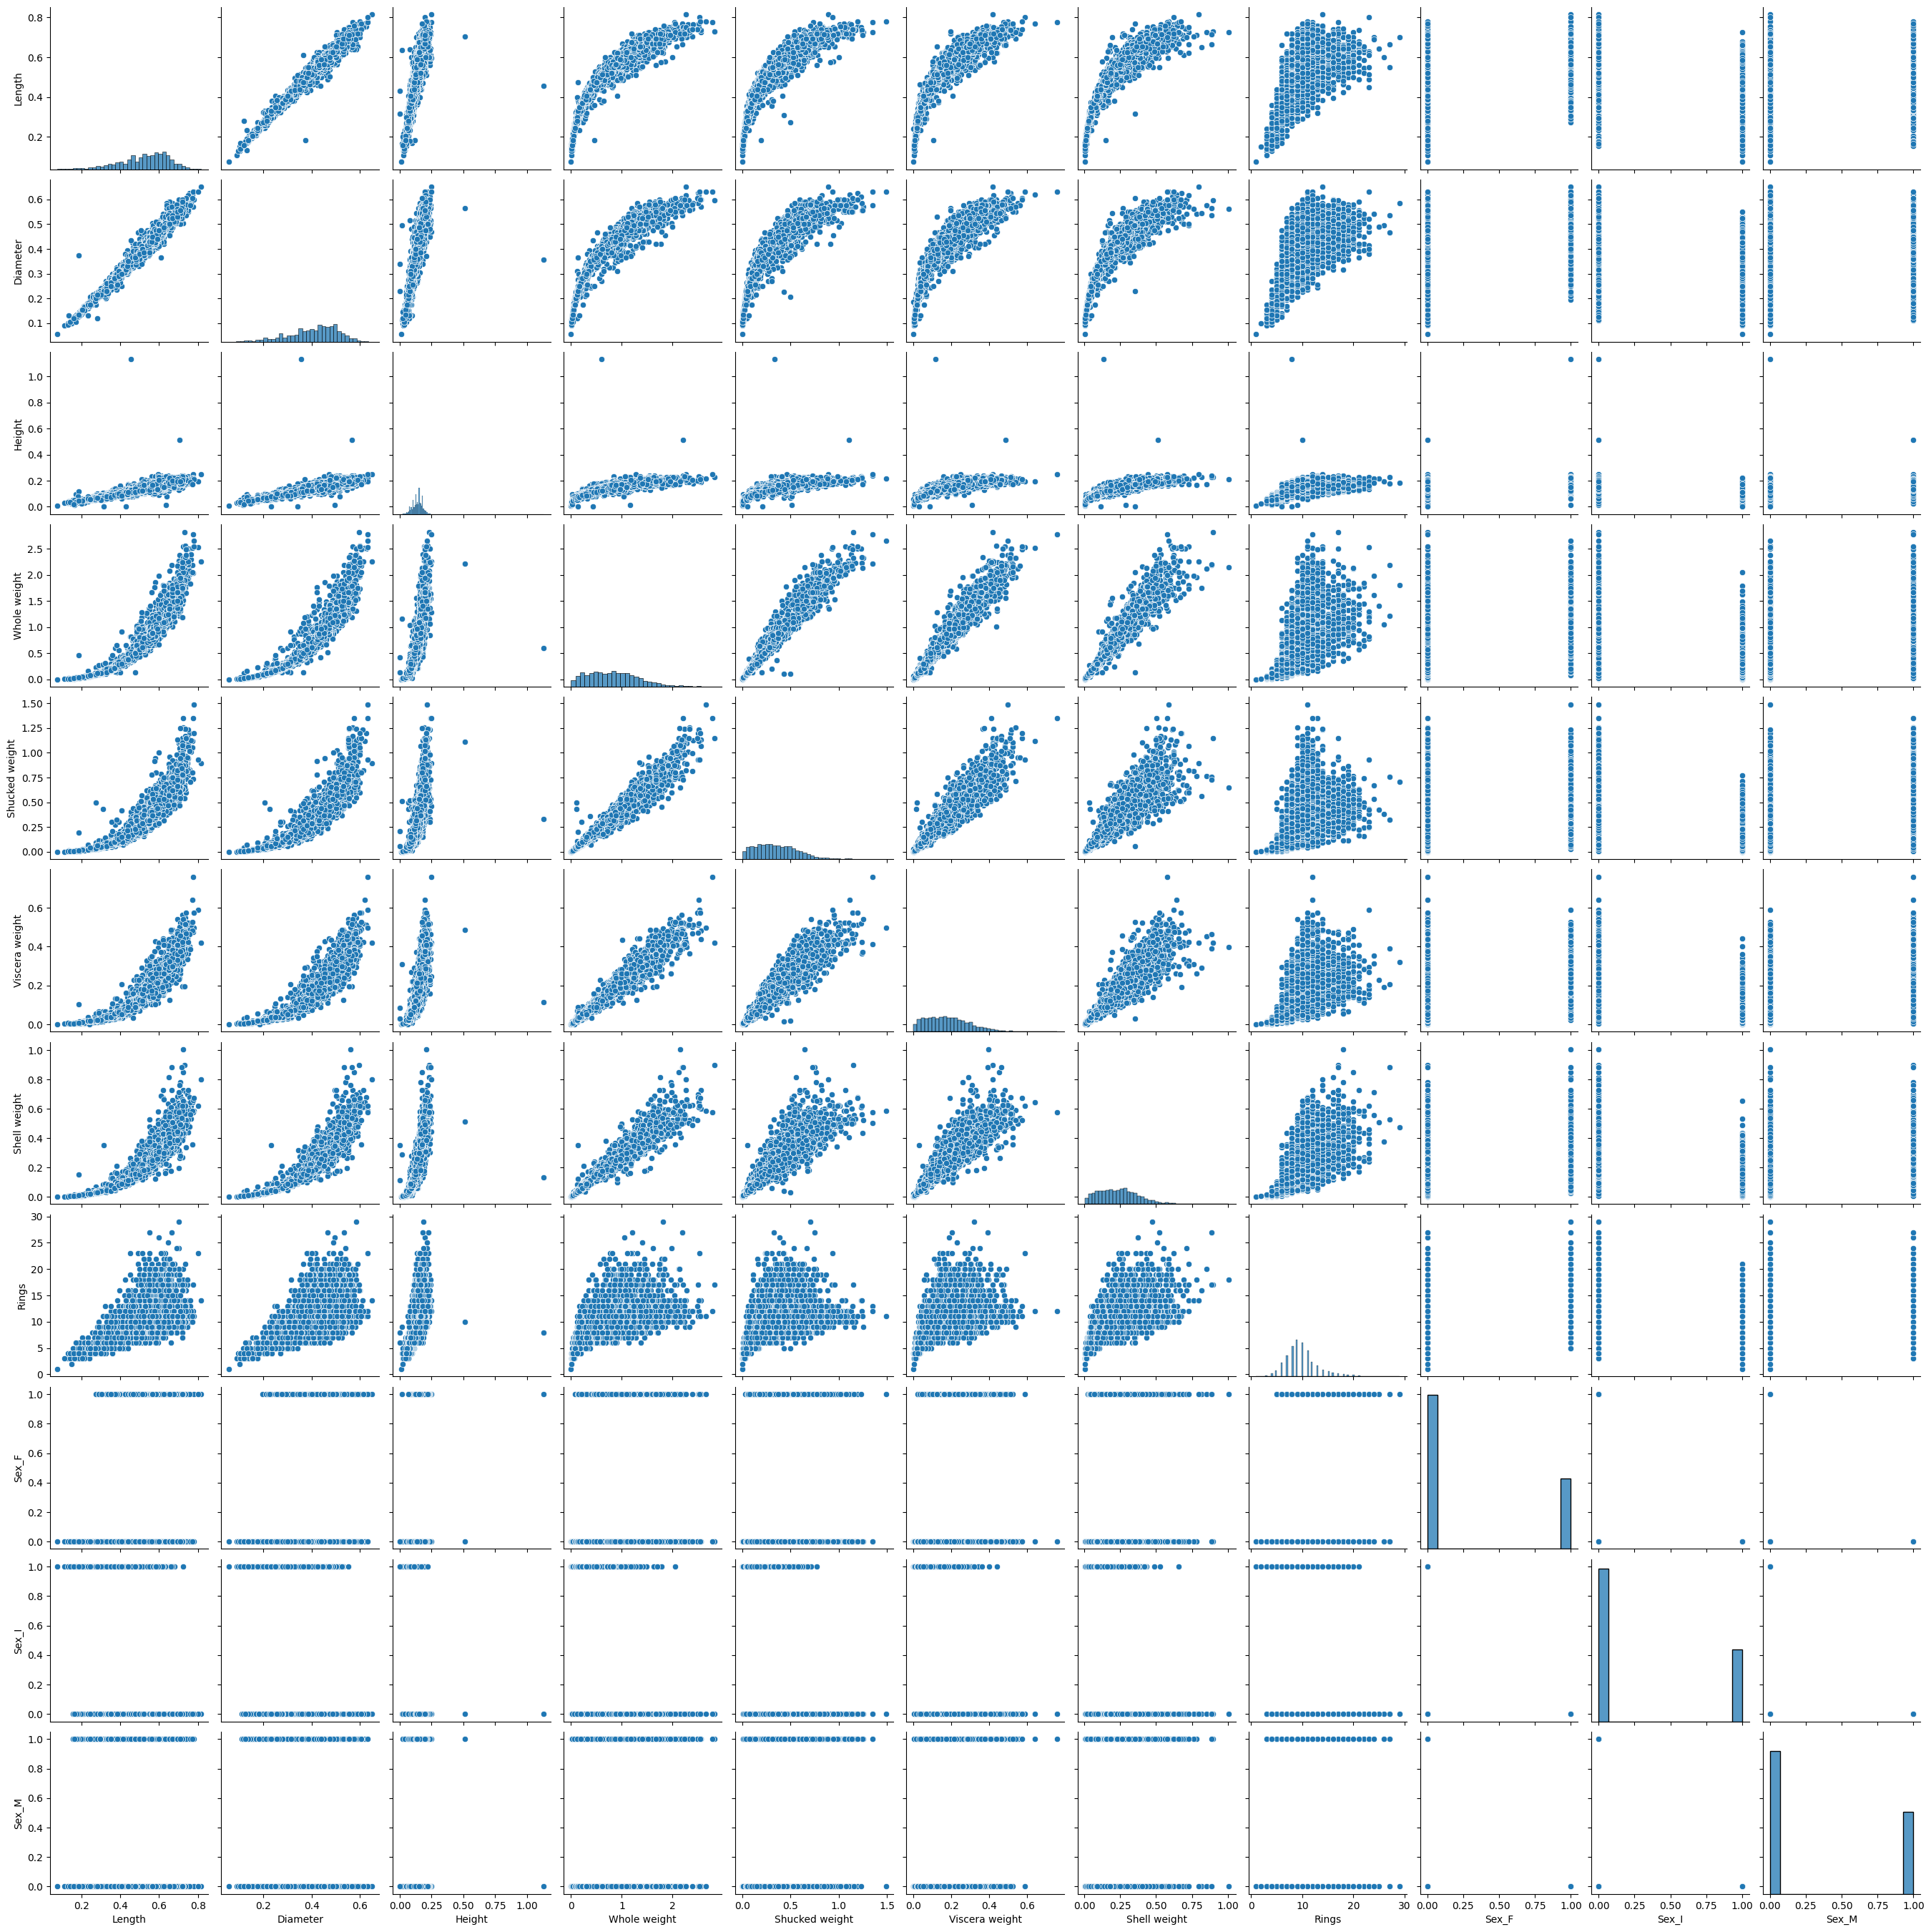

In [13]:
sns.pairplot(data)


# 4--Descriptive Statistics

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [15]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# 5--Handling missing values

In [16]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# There is no missing values in this dataset

# 6--Handling Outliers

# IQR

In [3]:
quant=data.quantile(q=[0.75,0.25])
quant

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0.75,0.615,0.48,0.165,1.1530,0.502,0.2530,0.329,11.0
0.25,0.450,0.35,0.115,0.4415,0.186,0.0935,0.130,8.0


In [4]:
iqr=quant.loc[0.75]-quant.loc[0.25]
iqr

Length            0.1650
Diameter          0.1300
Height            0.0500
Whole weight      0.7115
Shucked weight    0.3160
Viscera weight    0.1595
Shell weight      0.1990
Rings             3.0000
dtype: float64

# UPPER BOUND

In [5]:
upper=quant.loc[0.75]+(1.5*iqr)
print(upper)


Length             0.86250
Diameter           0.67500
Height             0.24000
Whole weight       2.22025
Shucked weight     0.97600
Viscera weight     0.49225
Shell weight       0.62750
Rings             15.50000
dtype: float64


# LOWER BOUND

In [6]:
lower=quant.loc[0.25]-(1.5*iqr)
lower

Length            0.20250
Diameter          0.15500
Height            0.04000
Whole weight     -0.62575
Shucked weight   -0.28800
Viscera weight   -0.14575
Shell weight     -0.16850
Rings             3.50000
dtype: float64


# MEAN

In [7]:
data.mean()

Length            0.523992
Diameter          0.407881
Height            0.139516
Whole weight      0.828742
Shucked weight    0.359367
Viscera weight    0.180594
Shell weight      0.238831
Rings             9.933684
dtype: float64

# Removing outlier

<AxesSubplot: >

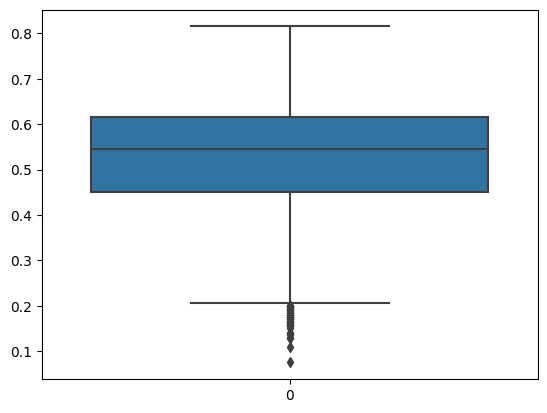

In [17]:
sns.boxplot(data['Length'])

<AxesSubplot: >

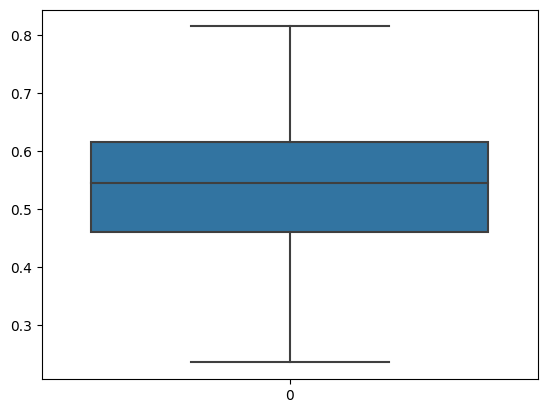

In [18]:
data['Length']=np.where(data['Length']< 0.23350,0.523992,data['Length'])
sns.boxplot(data['Length'])

# Outlier removed for Length

<AxesSubplot: >

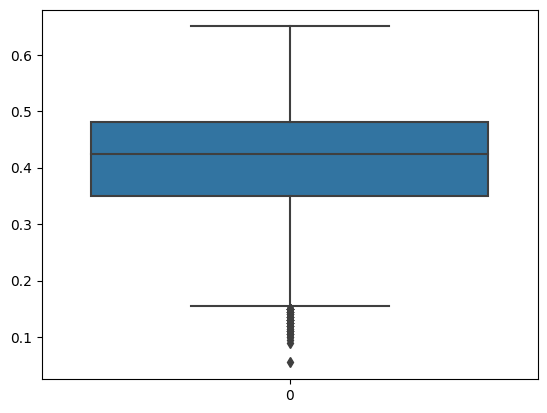

In [19]:
sns.boxplot(data['Diameter'])


<AxesSubplot: >

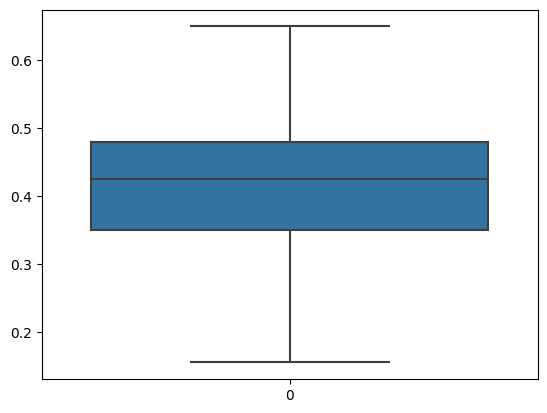

In [20]:
data['Diameter']=np.where(data['Diameter']<0.15500,0.407881,data['Diameter'])
sns.boxplot(data['Diameter'])

# Outlier removed for diameter

<AxesSubplot: >

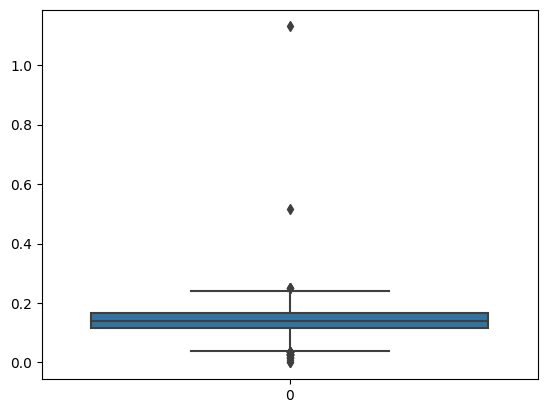

In [21]:
sns.boxplot(data['Height'])

<AxesSubplot: >

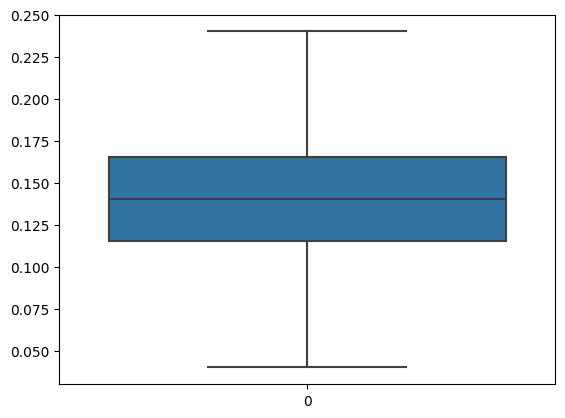

In [22]:
data['Height']=np.where(data['Height']< 0.04000,0.139516,data['Height'])
data['Height']=np.where(data['Height']> 0.24000,0.139516,data['Height'])
sns.boxplot(data['Height'])

# Outlier removed for Height

<AxesSubplot: >

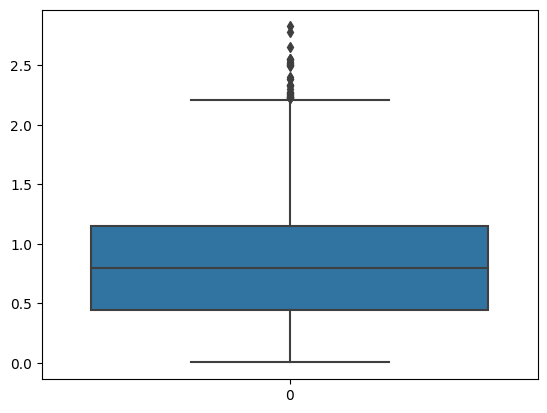

In [23]:
sns.boxplot(data['Whole weight'])

<AxesSubplot: >

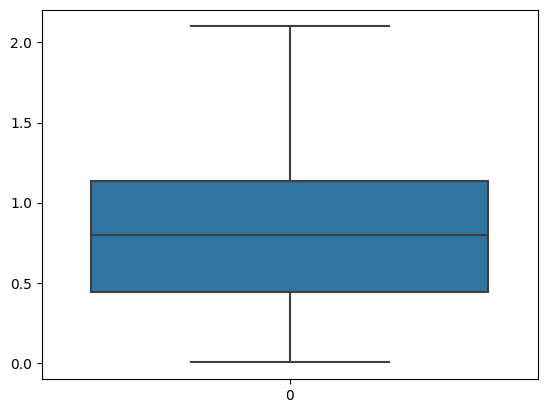

In [24]:
data['Whole weight']=np.where(data['Whole weight']> 2.10022,0.828742,data['Whole weight'])
sns.boxplot(data['Whole weight'])

In [25]:
# Outlier removed for Whole weightt

<AxesSubplot: >

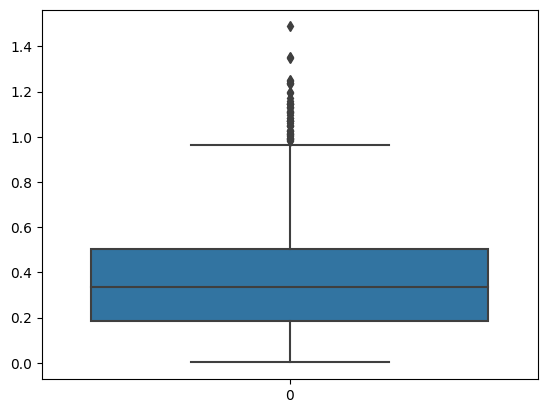

In [26]:
sns.boxplot(data['Shucked weight'])

<AxesSubplot: >

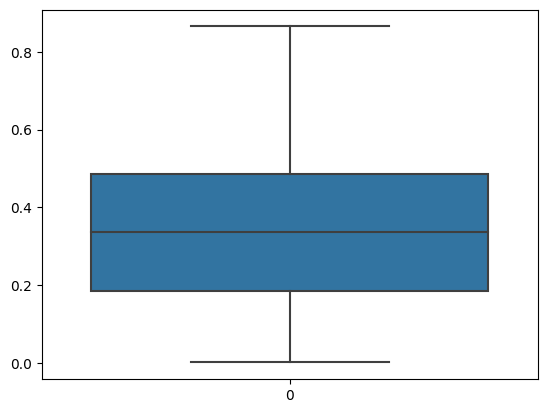

In [27]:
data['Shucked weight']=np.where(data['Shucked weight']> 0.86600,0.3593676,data['Shucked weight'])
sns.boxplot(data['Shucked weight'])


In [28]:
# Outlier removed for Shucked weight

<AxesSubplot: >

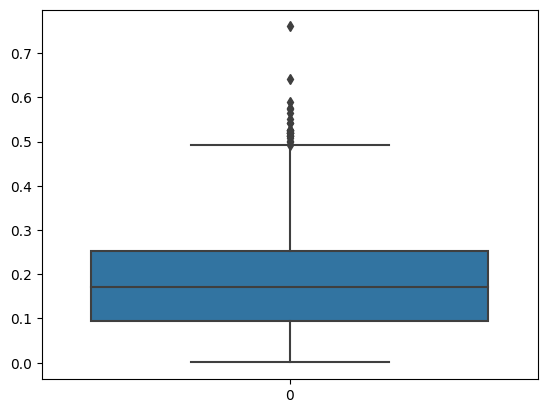

In [29]:
sns.boxplot(data['Viscera weight'])

<AxesSubplot: >

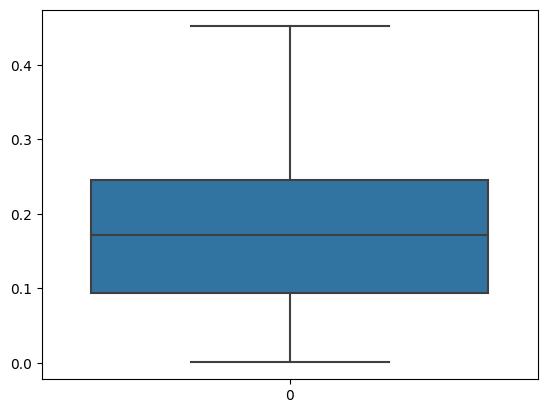

In [30]:
data['Viscera weight']=np.where(data['Viscera weight']> 0.45225,0.180594,data['Viscera weight'])
sns.boxplot(data['Viscera weight'])

In [31]:
# Outlier removed for Viscera weight

<AxesSubplot: >

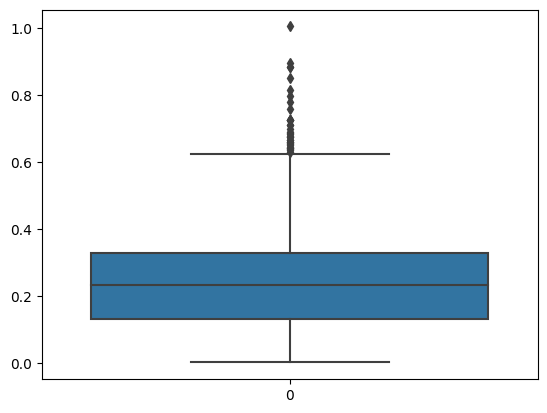

In [32]:
sns.boxplot(data['Shell weight'])

<AxesSubplot: >

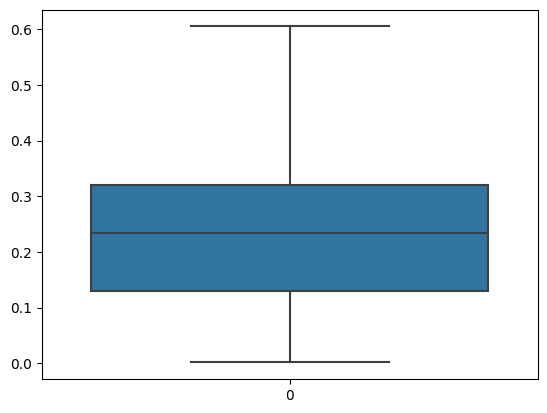

In [33]:
data['Shell weight']=np.where(data['Shell weight']> 0.60750,0.238831,data['Shell weight'])
sns.boxplot(data['Shell weight'])

In [34]:
# Outlier removed for Shell weight

<AxesSubplot: >

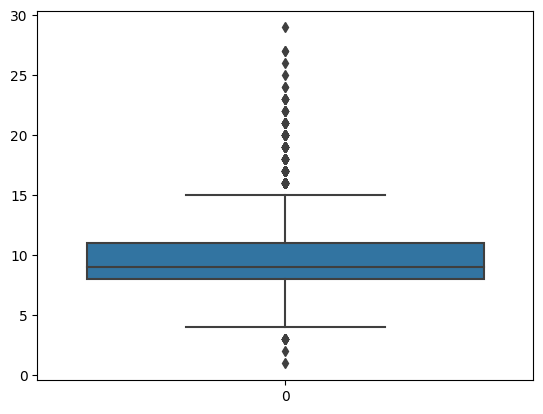

In [35]:
sns.boxplot(data['Rings'])

<AxesSubplot: >

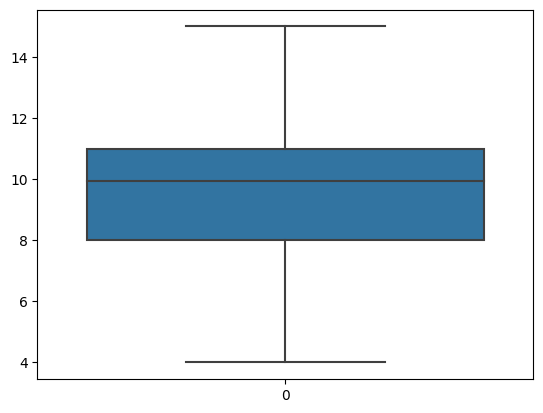

In [8]:
data['Rings']=np.where(data['Rings']> 15.50000,9.933684,data['Rings'])
data['Rings']=np.where(data['Rings']< 3.50000,9.933684,data['Rings'])
sns.boxplot(data['Rings'])

In [37]:
# Outlier removed for Rings

# 7--Encoding

In [3]:
data=pd.get_dummies(data,columns=['Sex'])


In [10]:
data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0,0,1,0


# 8--Splitting dependant and independant variables

In [4]:
x=data.drop(columns=['Rings']).values
y=data.Rings.values
x


array([[0.455, 0.365, 0.095, ..., 0.   , 0.   , 1.   ],
       [0.35 , 0.265, 0.09 , ..., 0.   , 0.   , 1.   ],
       [0.53 , 0.42 , 0.135, ..., 1.   , 0.   , 0.   ],
       ...,
       [0.6  , 0.475, 0.205, ..., 0.   , 0.   , 1.   ],
       [0.625, 0.485, 0.15 , ..., 1.   , 0.   , 0.   ],
       [0.71 , 0.555, 0.195, ..., 0.   , 0.   , 1.   ]])

In [12]:
y

array([15.,  7.,  9., ...,  9., 10., 12.])

# 9--Scaling independant variables

In [13]:
from sklearn.preprocessing import scale
x=scale(x)
x



array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.44898585, -1.439929  , -1.18397831, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.05003309,  0.12213032, -0.10799087, ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.54905203,  1.48263359,  1.32665906, ..., -0.67483383,
        -0.68801788,  1.31667716]])

# 10--splitting the data into training and testing

In [5]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)


In [44]:
x_train.shape

(3341, 10)

In [45]:
x_test.shape

(836, 10)

In [46]:
x.shape

(4177, 10)

In [47]:
y_train.shape

(3341,)

In [48]:
y_test.shape

(836,)

In [49]:
y_train.shape

(3341,)

# 11-Building the model

In [6]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(x_train,y_train)


LinearRegression()

# 12--Training the model

In [7]:
#prediction on training data

pred=reg.predict(x_train)
pred

array([ 5.32778396,  5.34787166, 13.87574587, ...,  9.71432748,
       11.7565958 ,  8.03917066])

In [8]:
#prediction on testing data
y_pred=reg.predict(x_test)
y_pred

array([13.17014483,  9.10922796, 10.35985364,  5.54120008, 10.65916033,
       12.05100358,  8.26779233, 10.09973617,  8.07089377, 12.28730504,
        8.22228608,  6.26339268,  8.4766956 ,  9.30261309,  5.70767624,
        9.45939464,  8.32687786, 13.85702971, 11.09090306,  7.77985409,
        7.44406172,  6.94780239,  8.88503259,  7.9654523 ,  9.51969794,
       11.56414001,  5.59707836, 13.11441854, 10.10204559, 11.59519979,
        8.45138755,  4.66462354, 11.30148049, 12.76604688,  7.15709165,
        8.63988457,  8.5200469 , 10.25020425,  8.16602336, 11.70289969,
       11.60141065,  9.56418323, 12.04986801, 11.89787512, 12.49372844,
        9.76276335,  9.2051602 , 11.83360392, 11.42857215,  7.90264847,
       11.93961315,  7.13983251,  9.40292052, 13.71258569,  9.35573394,
        8.09482073,  6.88614845,  7.8807578 ,  7.3433024 ,  7.10793707,
        9.7911508 ,  9.14297012, 10.43650314,  7.60734099,  8.01110075,
       12.3951208 , 12.398778  , 12.34386704,  8.53070865, 14.31

# 13--Testing the model

In [9]:
reg.predict([[0.530,0.139516,0.135,0.6770,0.2565,0.1415,0.210,1,0,0]])

array([7.93478621])

# 14--Performance using metrices

In [10]:
from sklearn.metrics import r2_score
print(f'Training accuracy:{(r2_score(y_train,pred))*100:.2f}%')
print(f'Testing accuracy:{(r2_score(y_test,y_pred))*100:.2f}%')

Training accuracy:53.70%
Testing accuracy:53.90%
